In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('dark_background')

In [2]:
import scipy.stats
from sklearn.metrics import mean_squared_error


## Evaluation of classification

In [3]:
detection_results = pd.read_csv( "../results/detection/detection_results_all_feat.csv", index_col = 0)
detection_results = detection_results.rename(columns={'Matrix short': 'matrix',
                                                      'Polarity': 'polarity'})
detection_results

,observed_value,prediction,regressor,name_short,adduct,matrix,polarity,fold
0,0,0,Logistic_reg,2-Oxoglutaric acid,+Cl,9AA,negative,0
1,0,1,Logistic_reg,3-Hydroxyanthranilic acid,+Cl,9AA,negative,0
2,0,0,Logistic_reg,3-Hydroxymethylglutaric acid,+Cl,9AA,negative,0
3,0,0,Logistic_reg,3-Phosphoglyceric acid,+Cl,9AA,negative,0
4,1,0,Logistic_reg,"4,5-Dihydroorotic acid",+Cl,9AA,negative,0
...,...,...,...,...,...,...,...,...
821,0,0,MLP,Valine,[M]-,pNA,positive,9
822,0,0,MLP,Xanthine,[M]-,pNA,positive,9
823,0,0,MLP,alpha-tocopherol,[M]-,pNA,positive,9
824,0,0,MLP,gamma-Aminobutyric acid,[M]-,pNA,positive,9


In [4]:
from sklearn.metrics import classification_report

score_cols = ['not_det_precision', 'not_det_recall', 'not_det_f1', 'not_detected',
                                            'det_precision', 'det_recall', 'det_f1', 'detected']

detection_metrics = pd.DataFrame(columns = ['matrix', 'polarity', 'classifier'] + score_cols)

counter = 0
for (matrix, polarity, classifier), rows in detection_results.groupby(['matrix', 'polarity', 'regressor']):
    clf_report = classification_report(rows.observed_value, rows.prediction, output_dict = True, zero_division=0)
    if rows.observed_value.max() == 0:
        print("no detection!")
    detection_metrics.loc[counter] = [matrix, polarity, classifier,
                                      clf_report['0']['precision'], clf_report['0']['recall'],
                                      clf_report['0']['f1-score'], clf_report['0']['support'],
                                      clf_report['1']['precision'], clf_report['1']['recall'],
                                      clf_report['1']['f1-score'], clf_report['1']['support'],]
    counter += 1

In [5]:
best_det_f1 = detection_metrics.loc[detection_metrics.groupby(['matrix', 'polarity'])["det_f1"].idxmax()].sort_values("det_f1", ascending=False)

# best_det_f1[["matrix", "polarity",  "det_f1", "classifier"]]
# best_det_f1["det_f1"].mean()
best_det_f1

,matrix,polarity,classifier,not_det_precision,not_det_recall,not_det_f1,not_detected,det_precision,det_recall,det_f1,detected
96,DHB,positive,SVC_poly,0.899170,0.903456,0.901308,839,0.761765,0.752907,0.757310,344
27,CHCA,positive,SVC_rbf,0.904437,0.915899,0.910132,868,0.759868,0.733333,0.746365,315
54,ClCCA,positive,SVC_poly,0.912849,0.908788,0.910814,899,0.715278,0.725352,0.720280,284
0,9AA,negative,DecisionTree,0.979339,0.918605,0.948000,1032,0.609302,0.867550,0.715847,151
139,pNA,positive,SVC_rbf,0.923810,0.919916,0.921859,949,0.680672,0.692308,0.686441,234
56,DAN,negative,DecisionTree,0.976697,0.921606,0.948352,1046,0.581633,0.832117,0.684685,137
14,CHCA,negative,DecisionTree,0.990732,0.957028,0.973588,1117,0.538462,0.848485,0.658824,66
112,NOR,negative,DecisionTree,0.961951,0.940840,0.951278,1048,0.607595,0.711111,0.655290,135
80,DHAP,positive,MLP,0.931174,0.932118,0.931646,987,0.656410,0.653061,0.654731,196
38,CMBT,positive,MLP,0.921971,0.923868,0.922919,972,0.645933,0.639810,0.642857,211


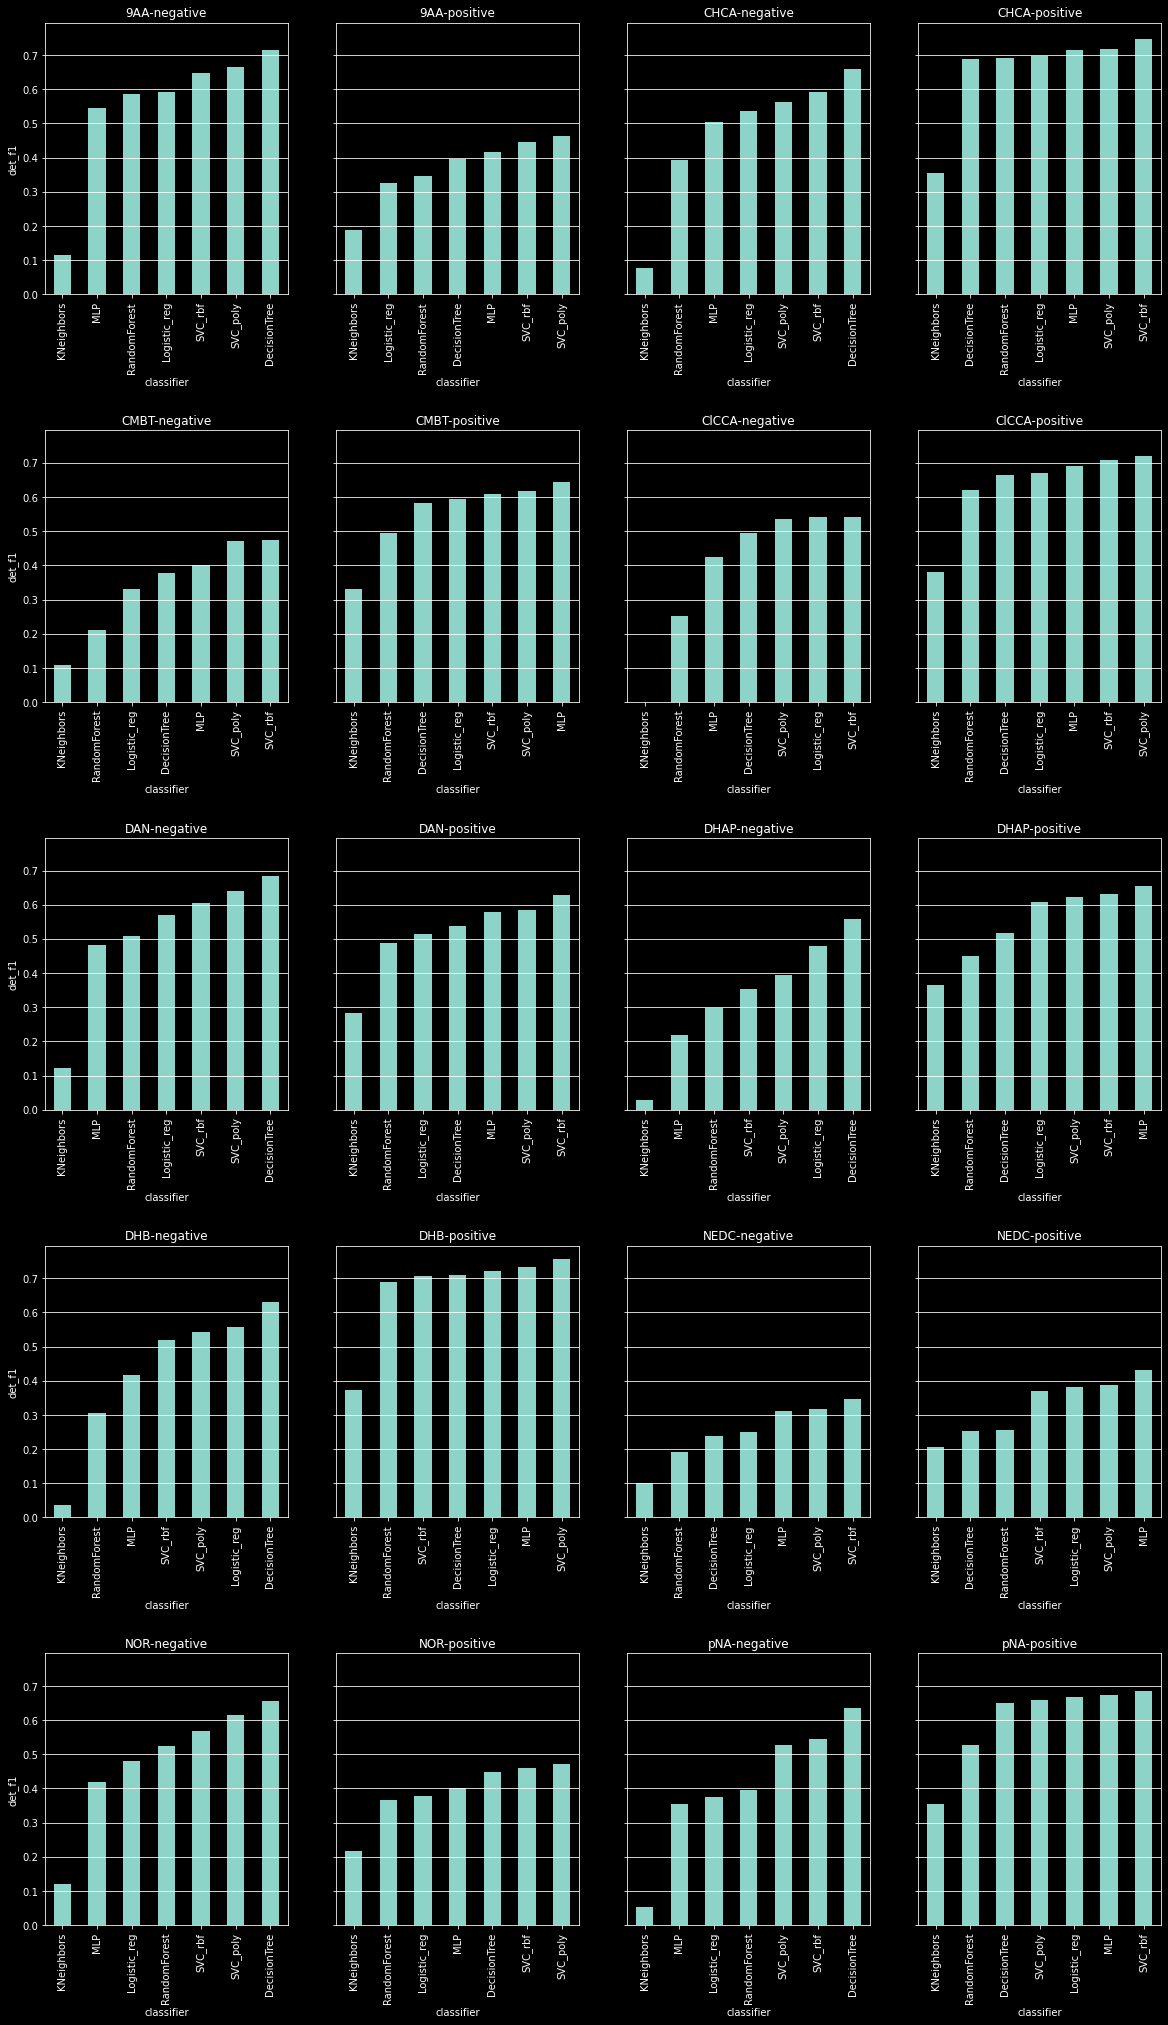

In [35]:
fig, axes = plt.subplots(ncols=4,nrows=5, sharey=True, figsize= (20, 35))
ax_list = axes.flat

metric = "det_f1"
#metric = "RMSE"

i = 0
for (matrix, polarity), rows in detection_metrics.groupby(['matrix', 'polarity']):
    rows = rows.set_index('classifier', drop = True).sort_values( by = metric)
    rows[metric].plot.bar(ax = ax_list[i], title=f"{matrix}-{polarity}")
    ax_list[i].set_ylabel(metric)
    ax_list[i].grid(axis='y')
    i+=1

plt.subplots_adjust(hspace=0.5)

plt.show()

### Std of scores over folds:

In [7]:
from sklearn.metrics import classification_report

score_cols = ['not_det_precision', 'not_det_recall', 'not_det_f1', 'not_detected',
                                            'det_precision', 'det_recall', 'det_f1', 'detected']

detection_metrics_over_fold = pd.DataFrame(columns = ['matrix', 'polarity', 'classifier', 'fold'] + score_cols)

counter = 0
for (matrix, polarity, classifier, fold), rows in detection_results.groupby(['matrix', 'polarity', 'regressor', 'fold']):
    clf_report = classification_report(rows.observed_value, rows.prediction, output_dict = True, zero_division=0)
    if rows.observed_value.max() == 0:
        print("no detection!")
    detection_metrics_over_fold.loc[counter] = [matrix, polarity, classifier, fold,
                                      clf_report['0']['precision'], clf_report['0']['recall'],
                                      clf_report['0']['f1-score'], clf_report['0']['support'],
                                      clf_report['1']['precision'], clf_report['1']['recall'],
                                      clf_report['1']['f1-score'], clf_report['1']['support'],]
    counter += 1

# Now compute std over folds:
detection_metrics_over_fold = detection_metrics_over_fold.groupby(['matrix', 'polarity', 'classifier'], as_index=False)[score_cols].std()
detection_metrics_over_fold




,matrix,polarity,classifier,not_det_precision,not_det_recall,not_det_f1,not_detected,det_precision,det_recall,det_f1,detected
0,9AA,negative,DecisionTree,0.031312,0.106252,0.070852,0.632456,0.261102,0.180710,0.211332,0.316228
1,9AA,negative,KNeighbors,0.029519,0.043761,0.034236,0.632456,0.043749,0.151790,0.067912,0.316228
2,9AA,negative,Logistic_reg,0.038839,0.115359,0.074482,0.632456,0.311173,0.245264,0.240052,0.316228
3,9AA,negative,MLP,0.024595,0.051302,0.030372,0.632456,0.268802,0.180842,0.160170,0.316228
4,9AA,negative,RandomForest,0.047947,0.187059,0.126246,0.632456,0.352054,0.326901,0.338037,0.316228
...,...,...,...,...,...,...,...,...,...,...,...
135,pNA,positive,Logistic_reg,0.045375,0.139669,0.081173,0.316228,0.237973,0.209142,0.172335,0.516398
136,pNA,positive,MLP,0.042929,0.109707,0.058491,0.316228,0.224540,0.204197,0.157702,0.516398
137,pNA,positive,RandomForest,0.058575,0.162373,0.101017,0.316228,0.243846,0.214795,0.161922,0.516398
138,pNA,positive,SVC_poly,0.037668,0.112286,0.065089,0.316228,0.243791,0.173739,0.166096,0.516398
